# ディープラーニングによる画像分類 （CNN for CIFAR-10）&#x1f439;
# <font color="Crimson ">課題</font>

### 担当教員： 長浜バイオ大学　和田 健之介

## 課題内容

下記のモデル設計では、<font color="Red">過学習</font>の傾向がはっきりと現れてしまっているため、<br>
モデルを改良し、精度と損失の２つのグラフにより過学習の状態になっていないことを確認しつつ、より一層の精度向上を目指す。

## 成績ランク
過学習がない状態で、テスト用データに対する最終評価(evaluation)の正解率で成績を決める。

- Ｓ・・・93.0 以上
- Ａ・・・90.0 以上 93.0 未満
- Ｂ・・・85.0 以上 90.0 未満
- Ｃ・・・80.0 以上 85.0 未満
- Ｄ・・・80.0 未満 もしくは 過学習 の状態

### 損失が低く、精度が高いモデルにするためのヒントと<font color='red'>過学習</font>の予防策：
01. より深い層への改良<br>
　　https://keras.io/ja/getting-started/sequential-model-guide/
02. オプティマイザの変更<br>
　　https://keras.io/ja/optimizers/
03. より高度な活性化関数への変更<br>
　　https://keras.io/ja/layers/advanced-activations/
04. BatchNormalization の導入<br>
　　https://keras.io/ja/layers/normalization/#batchnormalization
05. Dropout を適宜追加<br>
　　https://keras.io/ja/layers/core/#dropout
06. データ標準化<br>
　　https://blog.amedama.jp/entry/2016/07/06/000918
07. L2正則化<br>
　　https://keras.io/ja/regularizers/
08. 重みの初期化の変更<br>
　　https://keras.io/ja/initializers/
09. データ拡張 (ImageDataGenerator)<br>
　　https://keras.io/ja/preprocessing/image/#imagedatagenerator_1
10. 学習率の自動調整<br>
　　LearningRateScheduler<br>
　　https://keras.io/ja/callbacks/#learningratescheduler<br>
　　ReduceLROnPlateau<br>
　　https://keras.io/ja/callbacks/#reducelronplateau

### 参考になる本家のサイト
　https://keras.io/ja/

### サンプルプログラム:
　https://keras.io/examples/cifar10_cnn/<br>
　https://github.com/tensorflow/models/tree/master/research/resnet<br>
　https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

### 各種モデルによる精度の比較:
　https://www.kaggle.com/c/cifar-10/leaderboard<br>
　https://github.com/BIGBALLON/cifar-10-cnn<br>
　http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130<br>
　https://paperswithcode.com/sota/image-classification-on-cifar-10

## 参考書

### 『最短コースでわかる ディープラーニングの数学』
著者：    赤石 雅典  (著)<br>
出版社 :  日経BP<br>
ISBN-10:  4296102508<br>
ISBN-13:  978-4296102501<br>
発売日 :  2019年4月11日<br>
価格   :  2,900円 (＋税)

### 『scikit-learnとTensorFlowによる実践機械学習』
著者：    Aurélien Géron (著), 下田 倫大 (監修), 長尾 高弘  (翻訳)<br>
出版社 :  オライリージャパン<br>
ISBN-10:  4873118344<br>
ISBN-13:  978-4873118345<br>
発売日 :  2018年4月26日<br>
価格   :  4,500円 (＋税)

## CIFAR-10 (シーファーテン）
`10` のクラスにラベル付けされた `32 x 32` の大きさのカラー画像のデータセットで、 `50,000` 枚の<font color='red'>訓練用</font>画像と`10,000` 枚の<font color='red'>テスト用</font>画像とで構成されている。

参考:<br>
https://keras.io/ja/datasets/<br>
https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10 の正解ラベル名を設定

In [1]:
labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

## 計算開始時刻の記録

Google Colaboratory で実行する際に、日本時間の時刻を表示するためにはタイムゾーンの取得が必要となる。

In [2]:
import datetime
import pytz

start_time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
print(start_time)

2019-08-28 16:35:38.277503+09:00


## TensorFlow と Keras のバージョンの確認

In [3]:
import tensorflow as tf
import keras

print("TensorFlow: ", tf.__version__)
print("Keras     : ", keras.__version__)

TensorFlow:  1.13.1
Keras     :  2.2.5


Using TensorFlow backend.


## Warnings の抑制

今後の変更点などが警告として表示されるので、以下のセルの各文をコメントアウトして、一度は眺めておくと参考になる。

In [4]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

## Numpy の乱数の種を設定

再実行後も train, validation, test の各データセットが同一となるために必要

In [5]:
import numpy as np

seed = 1234567
np.random.seed(seed=seed)

## CIFAR-10 のデータセットをロード

In [6]:
from keras.datasets import cifar10

(X_train, Y_train), (x_tests, y_tests) = cifar10.load_data()

## 学習に使用するデータセットの割合を設定

In [7]:
# データセットの最初の rate (0～1) の割合だけ使用
rate = 1.0

num_train = round(X_train.shape[0] * rate)
num_tests = round(x_tests.shape[0] * rate)

arange_train = np.arange(X_train.shape[0])
select_train = np.random.choice(arange_train, num_train, replace=False) # 重複なし

arange_tests = np.arange(x_tests.shape[0])
select_tests = np.random.choice(arange_tests, num_tests, replace=False) # 重複なし

X_train = X_train[select_train]
Y_train = Y_train[select_train]

x_tests = x_tests[select_tests]
y_tests = y_tests[select_tests]

## CIFAR-10 の画像を 100枚だけ表示

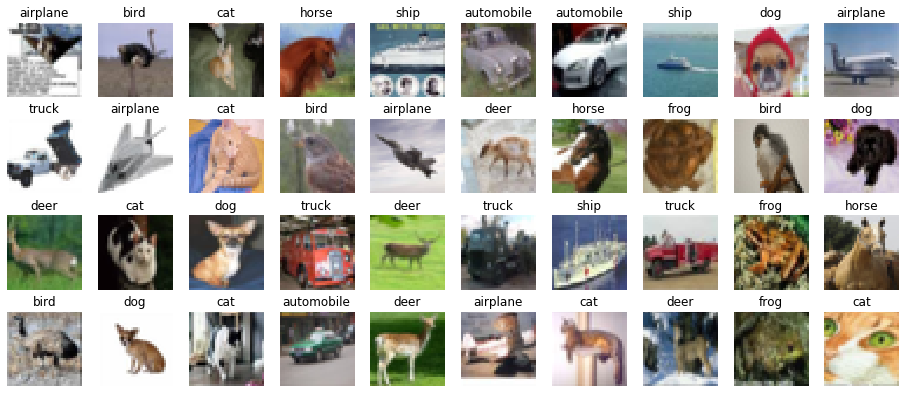

In [8]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

start = random.randint(0, x_tests.shape[0] / 2)
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.85, bottom=0.01)

for idx, img in enumerate(x_tests[start:(start+40)]):
    plt.subplot(4, 10, (idx + 1))
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[y_tests[start + idx][0]])

plt.show()

## 正解ラベルを One-hot 表現に変換

In [9]:
from keras.utils import to_categorical

num_classes = 10

Y_train = to_categorical(Y_train, num_classes)
y_tests = to_categorical(y_tests, num_classes)

## データの標準化 or 正規化

In [10]:
# 最後にテスト用画像を描画して、視覚的に確認するために、標準化前のオリジナルの画像データをコピーしておく
X_tests = np.copy(x_tests)

isStandardization = False

if isStandardization:
    X_train = X_train.astype('float32')
    x_tests = x_tests.astype('float32')
    X_train = (X_train - np.mean(X_train)) / np.std(X_train)
    x_tests = (x_tests - np.mean(x_tests)) / np.std(x_tests)
else:
    X_train = X_train.astype('float32') / 255.0
    x_tests = x_tests.astype('float32') / 255.0

## 上記でロードした train のデータを訓練 (Training) 用と検証 (Validation) 用とに分割

### <font color='red'>最重要な注意事項！</font>
1. <strong>テスト用のデータ `(x_tests, y_tests)` は、最終評価 `evaluation` まで一切使用しないこと !!</strong>
2. <strong>データ拡張は、訓練用のデータ `(x_train, y_tain)` に対してだけ適用</strong>し、検証用のデータ `(x_valid, y_valid)` には適用しないこと！
3. 分離に使用する<strong>関数名 <font color='blue'>`train_test_split`</font> の名前に惑わされない</strong>こと！この関数は単に指定された割合で２種類に区分するだけである。
4. 学習を `fit` で行う場合は、`validation_split` のパラメータを使って訓練用と検証用とに手軽に分割できるが、データ拡張などで `fit_generator` を使って学習させる場合には、このパラメータが使えないので、<strong>この段階で分割しておくことで無駄な混乱を避ける</strong>ことができる。

慣れないうちは、
# <font color='orange'>まぜるな危険！</font>　<font color='magenta'>訓練・検証・テスト！</font>
の<strong>合言葉</strong>を何度も何度も復唱し、脳というより身体に叩き込むこと！

In [11]:
from sklearn.model_selection import train_test_split

# 訓練用データの割合
train_size = 0.9

# 乱数の種
random_state = 1234567

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, train_size=train_size, random_state=random_state)

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_valid.shape = ", x_valid.shape)
print("y_valid.shape = ", y_valid.shape)
print("x_tests.shape = ", x_tests.shape)
print("y_tests.shape = ", y_tests.shape)

x_train.shape =  (45000, 32, 32, 3)
y_train.shape =  (45000, 10)
x_valid.shape =  (5000, 32, 32, 3)
y_valid.shape =  (5000, 10)
x_tests.shape =  (10000, 32, 32, 3)
y_tests.shape =  (10000, 10)


## モデルの構築

### `Sequential モデル`
　https://keras.io/ja/getting-started/sequential-model-guide/
 
### `Conv2D`
　https://keras.io/ja/layers/convolutional/#conv2d
  - `kernel_initializer`<br>
　https://keras.io/ja/initializers/#he_normal
  - `kernel_regularizer`<br>
　https://keras.io/ja/regularizers/#_2

### `Activation`
　https://keras.io/ja/activations/

### `BatchNormalization`
　https://keras.io/ja/layers/normalization/#batchnormalization
 
### `MaxPooling2D`
　https://keras.io/ja/layers/pooling/#maxpooling2d

### `Dropout`
　https://keras.io/ja/layers/core/#dropout

### `Flatten`
　https://keras.io/ja/layers/core/#flatten

### `Dense`
　https://keras.io/ja/layers/core/#dense

### `GlobalAveragePooling2D`
　https://keras.io/ja/layers/pooling/#globalaveragepooling2d

## <font color='red'>注意</font>

<strong>TensorFlow 1.13.2 ＋ Keras 2.2.4</strong> の場合、<strong>InputLayer</strong> を使ってモデルを構築すると、学習済みのモデルと重みをロードするときに、入力サイズに関するエラーが発生するため、<strong>Conv2D</strong> のパラメータ、<strong>input_shape</strong> で入力の形状を指定すること！

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation
from keras.layers import MaxPooling2D, Dropout, Flatten, Dense

padding    = 'valid'    # 画像サイズを元と同じにする場合は 'same'、両側が削れても構わない場合は 'valid'
activation = 'relu'     # 活性化関数を、例えば 'sigmoid ' に変えてみよう！

model = Sequential()

model.add(Conv2D(32, 3, padding=padding, input_shape=x_train.shape[1:]))
model.add(Activation(activation))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding=padding))
model.add(Activation(activation))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation(activation))

model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

## モデルの概要を表示

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

## モデルのコンパイル

### `compile`
　https://keras.io/ja/models/model/#compile
　
- `loss`<br>
　https://keras.io/ja/losses/<br>
  - mean_squared_error : 二乗誤差
  - mean_absolute_error : 絶対値誤差
  - mean_absolute_percentage_error, make : 正解とのズレ(絶対値)の割合
  - mean_squared_logarithmic_error, msle : 正解とのズレ(二乗誤差)の割合
  - squared_hinge : マイナスのところは 0, プラスは二乗誤差
  - hinge : マイナスのところは 0, プラスは絶対値
  - categorical_hinge: 多クラス分類用の hinge
  - logcosh: 予測誤差のハイパボリックコサインの対
  - binary_crossentropy : ２値分類 logloss
  - <font color='red'>categorical_crossentropy</font> : 多クラス分類 logloss
  - sparse_categorical_crossentropy : スパースラベルを取る categorical_crossentropy
  - kullback_leibler_divergence, kld : 分布の距離（的なもの）
  - poisson : 予測 - 正解 * log(予測) の平均
  - cosine_proximity : 予測と正解間のコサイン近似の負の平均<br>
　
- `optimizer`<br>
　https://keras.io/ja/optimizers/<br>
  - SGD: 確率的勾配降下法オプティマイザ
  - AdaGrad (2011): 多次元問題だと勾配が緩やかな方向には収束に時間がかかるため、各次元ごとに学習率を調整していくこうという手法
  - RMSprop (2012): 学習率が0に近くなった次元についても更新されるように改善したオプティマイザ．リカレントＮＮに対して良い選択となる
  - AdaDelta (2012): RMSprop における次元数のミスマッチ問題を解消したオプティマイザ
  - <font color='red'>Adam</font> (2015): RMSProp と momumtum を組み合わせたオプティマイザ
  - <font color='red'>AdaMax</font> (2015): 無限ノルムに基づくAdamの拡張
  - <font color='red'>Nadam</font> (2016): RMSProp と Nesterov momentum を組み合わせたオプティマイザ
  - TFOptimizer: TensorFlow のオプティマイザのためのラッパークラス<br>
　
- `metrics`<br>
　https://keras.io/ja/metrics/

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## TensorBoard の設定

下記のフォルダ内にある過去の学習ログのファイルを削除してから<br>
コマンドプロンプト上で、この Notebook のファイルがある場所に移動した後で、<br>
以下のコマンドを実行する。<br>

`tensorboard --logdir="./logs"`

上記のコマンドを実行後に、指示が表示されるので、ブラウザ上で<br>

`http://localhost:6006`

の URL を入力して TensorBoard を開く。

https://keras.io/ja/callbacks/#tensorboard

In [15]:
import os
from keras.callbacks import TensorBoard

log_dir = "logs"

if not (os.path.exists(log_dir) and os.path.isdir(log_dir)):
    os.mkdir(log_dir)

tb_cb = TensorBoard(
                log_dir=log_dir,
                write_graph=True,
                write_images=True)

## 学習の実行

参考：  https://keras.io/ja/models/model/#fit

### `fit`
- `x_train`, `y_train`<br>
　　モデルの訓練用データのセット．
- `epochs`<br>
　　モデルを訓練するエポック数．各エポックにおいて一つの訓練用データ全体を学習し、このプロセスをエポック数だけ繰り返す．<br>
- `batch_size`<br>
　　整数または None．勾配を更新するたびに読み込む訓練用データのサンプル数．<br>
　　指定しない場合はデフォルト値の 32 となる．<br>
- `validation_data`<br>
　　各エポックの最後に損失と精度を評価するために用いられる検証用データのセット (x_valid, y_valid)．<br>
　　モデルはこのデータで学習を行わないことに注意！<br>
- `verbose`<br>
　　`0`=標準出力にログを出力しない、`1`=ログをプログレスバーで出力，`2`=エポックごとに1行のログを出力
- `callbacks`<br>
　　各エポックで呼ばれるコールバック関数のリスト．

In [16]:
epochs     = 100
batch_size = 32

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_valid, y_valid),
                    verbose=1,
                    callbacks=[tb_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 6s 140us/step - loss: 2.3478 - acc: 0.1008 - val_loss: 2.3036 - val_acc: 0.0976
Epoch 2/100
45000/45000 [==============================] - 5s 113us/step - loss: 2.3077 - acc: 0.1009 - val_loss: 2.3030 - val_acc: 0.1028
Epoch 3/100
45000/45000 [==============================] - 5s 111us/step - loss: 2.3052 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1022
Epoch 4/100
45000/45000 [==============================] - 5s 111us/step - loss: 2.3040 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1038
Epoch 5/100
45000/45000 [==============================] - 5s 112us/step - loss: 2.3036 - acc: 0.1010 - val_loss: 2.3026 - val_acc: 0.1014
Epoch 6/100
45000/45000 [==============================] - 5s 112us/step - loss: 2.3036 - acc: 0.0986 - val_loss: 2.3029 - val_acc: 0.0988
Epoch 7/100
45000/45000 [==============================] - 5s 112us/step - loss: 2.3034 - acc: 0.1018 - val_loss: 2.3

45000/45000 [==============================] - 5s 108us/step - loss: 1.9633 - acc: 0.2796 - val_loss: 1.9319 - val_acc: 0.2942
Epoch 60/100
45000/45000 [==============================] - 5s 108us/step - loss: 1.9526 - acc: 0.2844 - val_loss: 1.9222 - val_acc: 0.3020
Epoch 61/100
45000/45000 [==============================] - 5s 108us/step - loss: 1.9409 - acc: 0.2899 - val_loss: 1.9123 - val_acc: 0.3082
Epoch 62/100
45000/45000 [==============================] - 5s 108us/step - loss: 1.9300 - acc: 0.2907 - val_loss: 1.9008 - val_acc: 0.3088
Epoch 63/100
45000/45000 [==============================] - 5s 109us/step - loss: 1.9224 - acc: 0.2974 - val_loss: 1.8894 - val_acc: 0.3146
Epoch 64/100
45000/45000 [==============================] - 5s 112us/step - loss: 1.9088 - acc: 0.3024 - val_loss: 1.8756 - val_acc: 0.3266
Epoch 65/100
45000/45000 [==============================] - 5s 111us/step - loss: 1.8991 - acc: 0.3071 - val_loss: 1.8690 - val_acc: 0.3282
Epoch 66/100
45000/45000 [=======

## 学習の履歴をグラフ表示

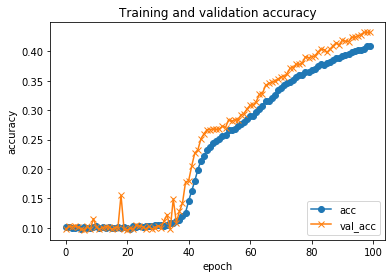

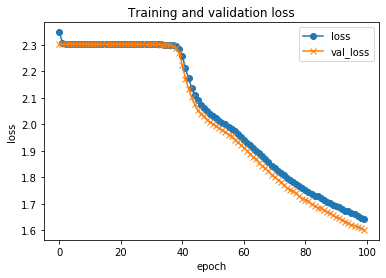

In [17]:
# acc、val_acc のプロット
plt.figure()
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training and validation accuracy")
plt.legend(loc="lower right")

# loss, val_loss のプロット
plt.figure()
plt.plot(history.history["loss"], label="loss", ls="-", marker="o")
plt.plot(history.history["val_loss"], label="val_loss", ls="-", marker="x")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training and validation loss")
plt.legend(loc="upper right")

plt.show()

## <font color='red'>テスト用データを使った最終評価</font>

https://keras.io/ja/models/model/#evaluate

In [18]:
loss, score = model.evaluate(x_tests, y_tests, batch_size=32, verbose=0)

print('Test loss    :', loss)
print('Test accuracy:', score)

Test loss    : 1.5799565984725952
Test accuracy: 0.4384


## テスト用データの先頭の 10 枚を可視化

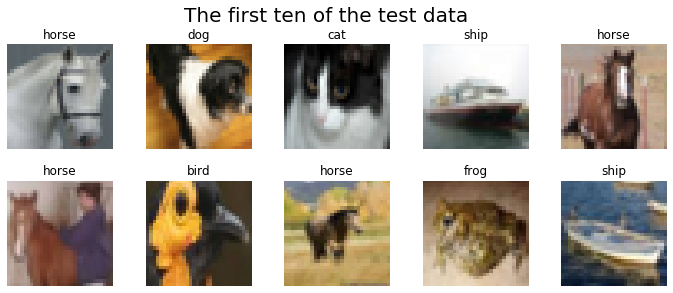

In [19]:
fig = plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.85, bottom=0.01)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_tests[i])
    plt.axis('off')
    answer = np.argmax(y_tests[i])
    plt.title(labels[answer])

plt.suptitle("The first ten of the test data", fontsize=20)
plt.show()

## テストデータの先頭の 10 枚の予測結果と正解ラベルを表示

In [20]:
print("予測：")
pred = np.argmax(model.predict(x_tests[:10]), axis=1)
s = ""
for i in range(10):
    s += "{:12s}".format(labels[pred[i]])
print(s)

print("\n正解：")
answer = np.argmax(y_tests[:10], axis=1)
s = ""
for i in range(10):
    s += "{:12s}".format(labels[answer[i]])
print(s)

予測：
bird        dog         dog         ship        frog        horse       frog        horse       deer        truck       

正解：
horse       dog         cat         ship        horse       horse       bird        horse       frog        ship        


## 経過時間を表示

In [21]:
end_time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
print("\nStart   Time  : " + str(start_time))
print(  "End     Time  : " + str(end_time))
print(  "Elapsed Time  : " + str(end_time - start_time))


Start   Time  : 2019-08-28 16:35:38.277503+09:00
End     Time  : 2019-08-28 16:44:04.774114+09:00
Elapsed Time  : 0:08:26.496611


## 計算終了を知らせるサウンドを再生する

### 無料の効果音：
　http://amachamusic.chagasi.com/genre_soundtrack.html<br>
　https://soundeffect-lab.info/

In [22]:
from playsound import playsound

playsound("fanfare.mp3")

## <font color='red'>典型的なエラーとその対処法</font>

1. スペルミスなどの初歩的なミスについては、エラーが表示された行を注意深くチェックする。<br>
行番号はメニューの<strong> `View` ⇒ `Toggle Line Numbers` </strong>を選択すると表示されるようになる。
2. 長いエラーメッセージの最後のほうに、<br>
<strong>`This is probably because cuDNN failed to initialize, ...`</strong><br>
といったメッセージが現れた場合、前に実行した Jupyter Notebook が GPU のリソースを解放していないケースが多い。<br>
前に実行したノートブック上で、メニューから <strong> `Kernel` ⇒ `Shutdown` </strong>を選択してカーネルを落とすか、<br>
ノートブックを開いたときに自動的に起動したコマンドプロンプトを、<br>
右上の赤いバツ印ボタンを何回か押して強制的に閉じてから、<br>
再度、startJupyter.bat をダブルクリックし、動かしたいノートブックを選択してから<strong> `Cell` ⇒ `Run All`</strong> で実行する。
3. 長いエラーメッセージの最後のほうに、<br>
<strong>`ResourceExhaustedError`</strong><br>
といった文字が現れた場合、起動時に自動的に開かれたコマンドプロンプトをチェックし、<br>
<strong>`ran out of memory trying to allocate ...`</strong><br>
といった、ＧＰＵのメモリー不足によるエラー <strong>`OOM  (Out Of Memory)`</strong>が表示されているときは、<br>
    - `batch_size` の値を半分に減らして再度試してみる。
    - `ImageDataGenerator` を使っていない場合は、この関数を使って `batch_size` ずつ逐次的にデータを処理できるように変更する。
    - モデルの構成をより小規模にする。
    - より多くのビデオメモリを搭載したＧＰＵにアップグレードする。<br>
<font color='red'>ただし、必要な電源容量、電源コネクタの種類と数、物理的なサイズ、などの条件を事前に調べること！</font>